## Problem Statement

We organized an exhibition showcasing 30 artworks, split between AI-generated and human-created pieces. Among the 75 guests invited, the challenge was for them to determine which artworks belonged to each category. Our goal is to analyze if their guesses differed significantly from what would be expected by a random 50/50 chance.


## Analysis Process
For this we are now creating hypothetical or demo data.

In [ ]:
# creating the data

library(tidyverse)
set.seed(45)
df <- tibble(
  SL  = seq(1,30,1),
  Human = sample(1:75, 30, replace = TRUE),
  AI = 75 - Human,
  Total_Respondents = 75
)

In [ ]:
df

SL,Human,AI,Total_Respondents
<dbl>,<int>,<dbl>,<dbl>
1,37,38,75
2,75,0,75
3,46,29,75
4,39,36,75
5,58,17,75
6,11,64,75
7,64,11,75
8,38,37,75
9,68,7,75


We have dataset with 30 rows, each representing the total number of respondents and their corresponding votes for AI-generated and human-generated artworks.

---



In [ ]:
# prompt: make percentage column for both ai and human column

df <- df %>%
  mutate( Human_Percentage = round((Human / Total_Respondents) * 100,2),
          AI_Percentage = round((AI / Total_Respondents) * 100,2)
        )


In [ ]:
df

SL,Human,AI,Total_Respondents,Human_Percentage,AI_Percentage
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,37,38,75,49.33,50.67
2,75,0,75,100.00,0.00
3,46,29,75,61.33,38.67
4,39,36,75,52.00,48.00
5,58,17,75,77.33,22.67
6,11,64,75,14.67,85.33
7,64,11,75,85.33,14.67
8,38,37,75,50.67,49.33
9,68,7,75,90.67,9.33


We've computed separate percentages for AI-generated and human-generated artwork, representing them in distinct columns. Our intention is to perform individual one sample t-tests for each column, aiming to ascertain whether the observed guesses significantly deviate from the outcomes expected in a scenario where responses align with a random 50/50 chance.



## One sample t -test
A one-sample t-test is a statistical method used to determine whether the mean of a single sample significantly differs from a known or hypothesized population mean. It assesses whether the sample mean is significantly different from the population mean, providing insights into whether observed differences are likely due to chance or if they represent a true effect within the population. This test is commonly used in research to compare a sample to a known or expected value, helping researchers draw conclusions about the population based on the sample data.

## Hypotheses:

We will test two hypotheses.

**Hypothesis 1:**

**Null Hypothesis (H0a):** The true mean percentage of correctly identified AI art is equal to 50%.

**Alternative Hypothesis (H1a):** The true mean percentage is different from 50%.

**Hypothesis 2:**

**Null Hypothesis (H0b):** The true mean percentage of correctly identified Human art is equal to 50%.

**Alternative Hypothesis (H1b):** The true mean percentage is different from 50%.


### Assumption test
* The variable under study should be either an interval or ratio variable.

* The observations in the sample should be independent.

* The variable under study should be approximately normally distributed.

* The variable under study should have no outliers.




In [ ]:
# normality checking

shapiro.test(df$Human_Percentage)
shapiro.test(df$AI_Percentage)


	Shapiro-Wilk normality test

data:  df$Human_Percentage
W = 0.95009, p-value = 0.17



	Shapiro-Wilk normality test

data:  df$AI_Percentage
W = 0.95009, p-value = 0.17


From the output, the p-value is greater than the significance level 0.05 indicating that the distribution of the data are not significantly different from the normal distribution. In other words, we can assume the normality. We can see this visually from below.

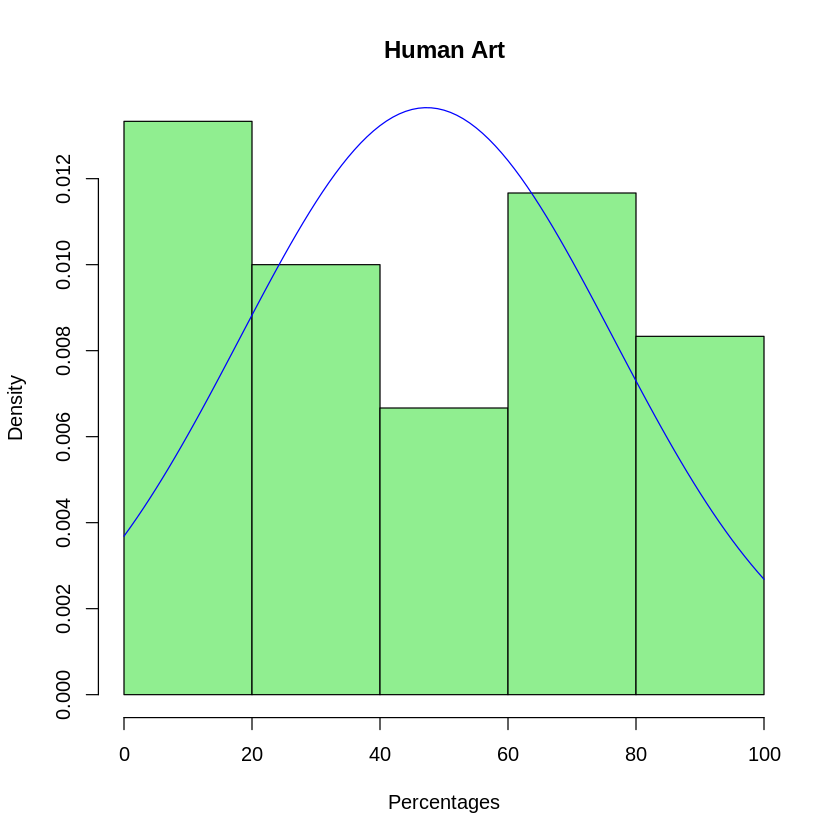

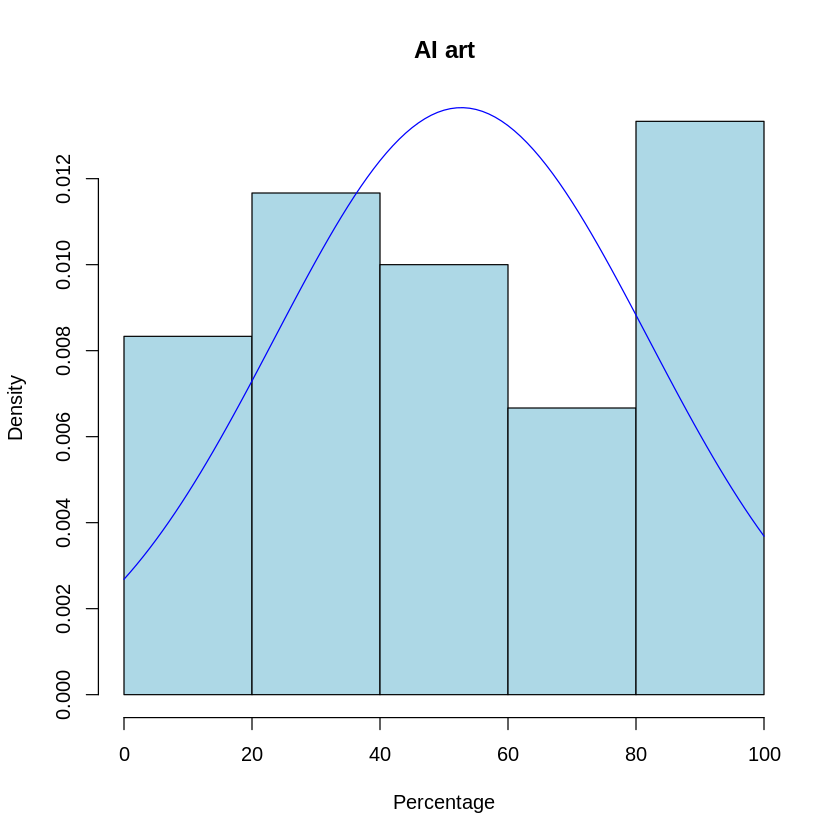

In [ ]:

hist(df$AI_Percentage, freq=FALSE, col = 'lightblue', main = 'AI art', xlab = 'Percentage', ylab = 'Density')
curve(dnorm(x, mean = mean(df$AI_Percentage), sd = sd(df$AI_Percentage)), add = TRUE, col = 'blue')


hist(df$Human_Percentage, freq=FALSE, col = 'lightgreen', main = 'Human Art', xlab = 'Percentages', ylab = 'Density')
curve(dnorm(x, mean = mean(df$Human_Percentage), sd = sd(df$Human_Percentage)), add = TRUE, col = 'blue')


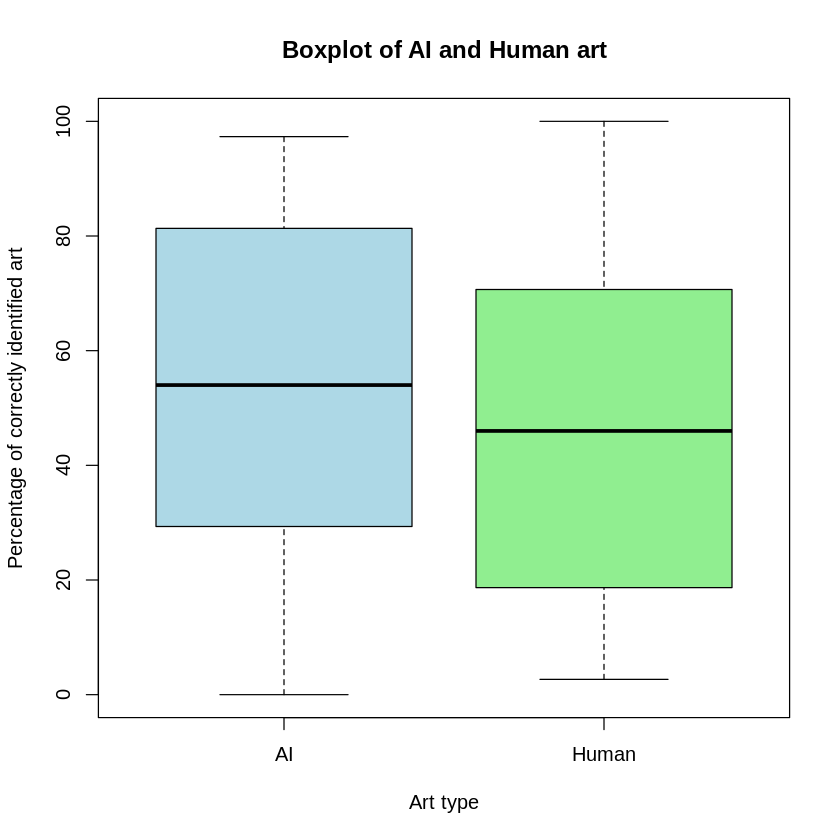

In [ ]:
# boxplots

boxplot(df$AI_Percentage, df$Human_Percentage, names=c("AI", "Human"),
         col=c("lightblue", "lightgreen"), main="Boxplot of AI and Human art",
         xlab="Art type", ylab="Percentage of correctly identified art")


From the boxplots we can see that there are no outliers. So literally our all assumptions are fullfilled.

### Test results:

**Hypothesis 1:**

In [ ]:
t.test(df$AI_Percentage, mu = 50)


	One Sample t-test

data:  df$AI_Percentage
t = 0.50799, df = 29, p-value = 0.6153
alternative hypothesis: true mean is not equal to 50
95 percent confidence interval:
 41.79826 63.62240
sample estimates:
mean of x 
 52.71033 


We can see that the Mean of the observed percentages is 52.71% with 95% Confidence Interval: (41.79%, 63.62%).
The one-sample t-test yielded a t-statistic of 0.508 with a corresponding p-value of 0.6153. This p-value is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis. Based on the results, there is insufficient evidence to suggest that the mean percentage of correctly identified AI art differs significantly from the expected chance level of 50%.


**Hypothesis 2:**


In [ ]:
t.test(df$Human_Percentage, mu = 50)


	One Sample t-test

data:  df$Human_Percentage
t = -0.50799, df = 29, p-value = 0.6153
alternative hypothesis: true mean is not equal to 50
95 percent confidence interval:
 36.37760 58.20174
sample estimates:
mean of x 
 47.28967 


We can see that the Mean of the observed percentages is 47.28% with 95% Confidence Interval: (36.37%, 58.20%).
The one-sample t-test yielded a t-statistic of -0.508 with a corresponding p-value of 0.6153. This p-value is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis. Based on the results, there is insufficient evidence to suggest that the mean percentage of correctly identified Human art differs significantly from the expected chance level of 50%.

## Conclusion

Upon analyzing the outcomes of the one-sample t-tests, indications point toward the possibility that individuals might be simply making random guesses.